>## Task 22

### Fundamentals of Machine Learning

#### Four Branches of Machine Learning

##### 1. Supervised Learning

- The most common branch of machine learning.
- Consists of input data to known targets called *annotations*.
- Optical character recognition, speech recognition, image classification, and language translation are all examples of supervised learning.
- _**Sequence generation**_ is where the output is a sequence of values such as a sentence translation.
- _**Syntax tree prediction**_ is where the input is a sequence of values and the output is a tree of values that shows the relationship between the values in the sequence.
- _**Object detection**_ is  where the input is an image and the output is a list of bounding boxes around the objects in the image.
- _**Image segmentation**_ is  where the input is an image and the output is a mask that shows which pixels belong to which object.

##### 2. Unsupervised Learning

- The branch of machine learning where the training data consists of input data without any corresponding targets.
- Used for the purposes of data visualization, data compression, or data denoising.
- _**Dimensionality reduction**_ is where the input data is a high-dimensional space and the output data is a lower-dimensional space.
- _**Clustering**_ is where the input data is a high-dimensional space and the output data is a set of clusters.

##### 3. Self-supervised Learning

- The branch of machine learning where the training data is generated from the input data without any human-annotated labels (typically using a heuristic algorithm).
- _**Autoencoders**_ are a common example of self-supervised learning. The input data is the target data, and the output data is the input data. The autoencoder learns to compress the input data into a lower-dimensional space and then decompress it back into the original input data.
- Predicting the next frame in a video, predicting the next word in a sentence, and predicting the missing word in a sentence are all examples of self-supervised learning.

##### 4. Reinforcement Learning

- The branch of machine learning where the agent learns to perform actions in an environment to maximize a reward.
- A neural network that plays a video game is an example of reinforcement learning.

#### Classification and Regression Glossary

- _**Sample**_ is a single data point that goes into your model.
- _**Prediction**_ is the output of your model.
- _**Target**_ is the truth. What your model should ideally have predicted, according to an external source of data.
- _**Prediction error**_ is the difference between the target and the prediction.
- _**Classes**_ are a set of possible labels to choose from in a classification problem.
- _**Label**_ is a specific instance of a class annotation in a classification problem.
- _**Ground-truth**_ is all the labels for a dataset, typically collected by humans.
- _**Binary classification**_ is a classification task where each sample is assigned one of two possible labels.
- _**Multiclass classification**_ is a classification task where each sample is assigned one of more than two possible labels.
- _**Multilabel classification**_ is a classification task where each sample is assigned a set of target labels. This can be thought of as predicting properties of a data-point that are not mutually exclusive.
- _**Scalar regression**_ is a task where the target is a continuous scalar value.
- _**Vector regression**_ is a task where the target is a set of continuous values.
- _**Mini-batch**_ is a small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.

#### Evaluating Machine-Learning Models

##### Training, Validation, and Test Sets

- _**Training set**_ is the data that the model learns from.
- _**Validation set**_ is the data that the model is evaluated on during training.
- _**Test set**_ is the data that the model is evaluated on after training.
- Configuration tuning is the process of adjusting the configuration of a model to get the best performance.
- _**Hyperparameters**_ are the configuration settings used in tuning.
- _**Parameter**_ is a configuration setting that is learned by the model during training.
- _**Information leaks**_ are when information about the test set leaks into the model during training or validation, resulting in overly optimistic validation metrics.


##### Simple Hold-Out Validation

- _**Hold-out validation**_ is when you hold out a portion of the training data to use as a validation set.

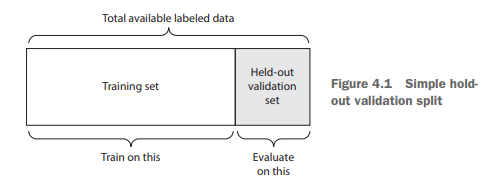

```python
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))
test_score = model.evaluate(test_data)
```
- The validation score is used to tune the model.
- Simplest evaluation protocol.
- Flaw: the validation set is small, which makes the validation scores a high variance estimate of the performance of the model on unseen data.


##### K-Fold Validation

- _**K-fold validation**_ is when you split the data into K partitions of equal size. For each partition i, train a model on the remaining K – 1 partitions, and evaluate it on partition i. The final score is the averages of the K scores obtained.

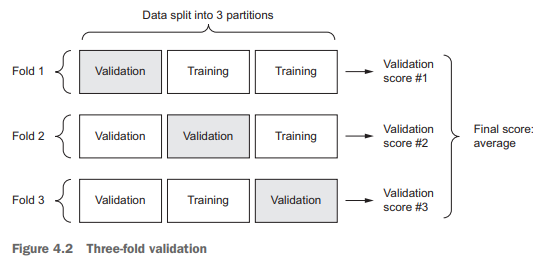

```python
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
                    data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)
```
- The validation score is the average of the K validation scores obtained.

##### Iterated K-Fold Validation with Shuffling

- _**Iterated K-fold validation**_ is when you apply K-fold validation multiple times, shuffling the data every time before splitting it K ways. The final score is the average of the scores obtained at each run of K-fold validation. This method is helpful when the performance of your model shows significant variance based on your train-test split.

#### Things to Keep in Mind

- _**Data representativeness**_ is the extent to which the data samples are representative of the problem you’re trying to solve.
- _**The arrow of time**_ is the assumption that training data and test data should be assumed to be independent, coming from the same distribution.
- _**Redundancy in your data**_ is when some samples in your training or validation data are very similar to other samples in the training or validation data.
- _**The measure of success**_ is the success metric you use to evaluate your model.